<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [3]:
import pandas as pd
import psycopg2

In [4]:
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [20]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [2]:
# текст запроса
query_3_1 = f'''select *
                from public.vacancies
            '''

vacancies = pd.read_sql_query(query_3_1, connection)
vacancies

NameError: name 'pd' is not defined

In [56]:
vacancies.shape[0]

49197

In [57]:
# результат запроса
# 49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [61]:
# текст запроса
query_3_2 = f'''select *
                from public.employers
            '''

employers = pd.read_sql_query(query_3_2, connection)
employers

C:\Users\Марат\AppData\Local\Temp\ipykernel_10616\637098169.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers = pd.read_sql_query(query_3_2, connection)


,id,name,area
0,2393,"Программный Продукт, ИТ-компания",1
1,72977,БАРС Груп,88
2,3155,"Бест, Торгово-производственная компания, Екате...",3
3,675,КОРУС Консалтинг,2
4,1840010,филиал ФКУ Налог-Сервис ФНС России в Республик...,88
...,...,...,...
23496,1441774,МарКо,88
23497,4718575,MKomov Studio,73
23498,3702770,АКИБ Ипотека-банк,2759
23499,5636092,ГИМ-КЛИНИКА,99


In [62]:
employers.shape[0]

23501

In [8]:
# результат запроса
# 23501

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [63]:
# текст запроса
query_3_3 = f'''select *
                from public.areas
            '''

areas = pd.read_sql_query(query_3_3, connection)
areas.shape[0]

C:\Users\Марат\AppData\Local\Temp\ipykernel_10616\3323548290.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  areas = pd.read_sql_query(query_3_3, connection)


1362

In [10]:
# результат запроса
# 1362

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [64]:
# текст запроса
query_3_4 = f'''select *
                from public.industries
            '''

industries = pd.read_sql_query(query_3_4, connection)
industries.shape[0]

C:\Users\Марат\AppData\Local\Temp\ipykernel_10616\464934114.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  industries = pd.read_sql_query(query_3_4, connection)


294

In [12]:
# результат запроса
# 294

***

In [5]:
# выводы по предварительному анализу данных
# Один работодатель предлагает в среднем две вакансии. Чтобы сделать больше выводов, посмотрим на лидеров по числу вакансий

query_cnt_empl = f'''select 
                    e.name area,
                    count(*) cnt
                from public.vacancies v
                join public.employers e on e.id = v.employer_id
                group by e.name
                order by cnt desc
                limit 5
            '''

cnt_empl = pd.read_sql_query(query_cnt_empl, connection)
cnt_empl


C:\Users\Марат\AppData\Local\Temp\ipykernel_2504\628947811.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cnt_empl = pd.read_sql_query(query_cnt_empl, connection)


,area,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


Как видно из этой таблицы, даже лидер таблицы - Яндекс - представляет не более десятой части вакансий. В этом случае можно говорить об отсутствии монополии на рынке труда.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [65]:
# текст запроса

query_cnt_area = f'''select 
                    a.name area,
                    count(*) cnt
                from public.vacancies v
                join public.areas a on a.id = v.area_id
                group by a.name
                order by cnt desc
                limit 5
            '''

cnt_area = pd.read_sql_query(query_cnt_area, connection)
cnt_area

C:\Users\Марат\AppData\Local\Temp\ipykernel_10616\3758122410.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cnt_area = pd.read_sql_query(query_cnt_area, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


In [15]:
# результат запроса

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [66]:
# текст запроса

query_salary_known = f'''select count(*)
                        from public.vacancies
                        where salary_from IS NOT NULL or salary_to IS NOT NULL 
                        '''

salary_known = pd.read_sql_query(query_salary_known, connection)
salary_known

C:\Users\Марат\AppData\Local\Temp\ipykernel_10616\3919451189.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_known = pd.read_sql_query(query_salary_known, connection)


,count
0,24073


In [17]:
# результат запроса
# 24073

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [67]:
# текст запроса

query_salary_fork = f'''select salary_from, salary_to
                        from public.vacancies
                        '''

salary_fork = pd.read_sql_query(query_salary_fork, connection)
salary_fork

C:\Users\Марат\AppData\Local\Temp\ipykernel_10616\353767413.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_fork = pd.read_sql_query(query_salary_fork, connection)


,salary_from,salary_to
0,64000.0,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,15000.0,NaN
...,...,...
49192,NaN,NaN
49193,NaN,NaN
49194,60000.0,NaN
49195,146456.0,244094.0


In [72]:
display (round (salary_fork['salary_from'].mean(),0), 
round (salary_fork['salary_to'].mean(),0))

71065.0

110537.0

In [19]:
# результат запроса

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [8]:
# текст запроса

query_sched_emp = f'''select schedule, employment, count(*) AS count_vacancies
                        from public.vacancies
                        group by schedule, employment
                        order by count_vacancies desc
                        --limit 2
                        '''

sched_emp = pd.read_sql_query(query_sched_emp, connection)
sched_emp

C:\Users\Марат\AppData\Local\Temp\ipykernel_2504\37006918.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sched_emp = pd.read_sql_query(query_sched_emp, connection)


,schedule,employment,count_vacancies
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


In [21]:
# результат запроса

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [76]:
# текст запроса

query_experience = f'''select experience, count(*) AS count_vacancies
                        from public.vacancies
                        group by experience
                        order by count_vacancies
                        '''

experience = pd.read_sql_query(query_experience, connection)
experience

C:\Users\Марат\AppData\Local\Temp\ipykernel_10616\223111042.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  experience = pd.read_sql_query(query_experience, connection)


,experience,count_vacancies
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


In [23]:
# результат запроса

***

In [24]:
# выводы по детальному анализу вакансий

Что касается лидеро по числу вакансий среди регионов, то в большинстве случаев число вакансий примерно равно числу жителей, выраженному в тысячах. Это правило нарушается только для двух крупнейших городов России: Москвы и Санкт-Петербурга. Это может быть связано с тем, что большое население в них связано с притоком по большей части низкоквалифицированной рабочей силой, чьи вакансии почти не представленый в hh.

Теперь порассуждаем о распределении вакансий по опыту работы. Сравнивая его и распределение зарплат среди всех профессий:

In [11]:
query_avg = f'''
select
experience,
avg(salary) av
from 
(select
experience,
coalesce(salary_from, 0) + coalesce(salary_to, 0) salary 
from VACANCIES
where 
(salary_from is NULL or salary_to is NULL)

union all

(
select
experience,
(coalesce(salary_from, 0) + coalesce(salary_to, 0)) / 2 salary 
from VACANCIES
where 

((not salary_from is NULL) and not (salary_to is NULL))
)
) x
where salary > 0
group by experience
             '''


avg = pd.read_sql_query(query_avg, connection)
avg

C:\Users\Марат\AppData\Local\Temp\ipykernel_2504\4238554787.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg = pd.read_sql_query(query_avg, connection)


,experience,av
0,От 3 до 6 лет,133210.916976
1,От 1 года до 3 лет,76540.818863
2,Более 6 лет,166256.080000
3,Нет опыта,40471.945005


In [ ]:
можно обнаружить следуюшиее: средняя зарплата ожидаемо растет, в то время как число вакансий имеет максимум при умеренном опыте работы. На работников этой категории работодатели тратят наибольшее количество денег.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [4]:
# текст запроса

query_cnt_empl = f'''select 
                    e.name,
                    count(*) cnt
                from public.vacancies v
                join public.employers e on e.id = v.employer_id
                group by e.name
                order by cnt desc
                limit 5
            '''

cnt_empl = pd.read_sql_query(query_cnt_empl, connection)
cnt_empl

C:\Users\Марат\AppData\Local\Temp\ipykernel_6928\412432646.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cnt_empl = pd.read_sql_query(query_cnt_empl, connection)


,name,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


C:\Users\Марат\AppData\Local\Temp\ipykernel_24424\2468521022.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ar_empl_vac = pd.read_sql_query(query_ar_empl_vac, connection)


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [6]:
# текст запроса vacancies
 
query_ar_empl_vac = f'''select x.name,
count(distinct e.id) cnt_e
from ( select

a.name,
a.id area_id
from public.areas a
left JOIN public.vacancies v on v.area_id = a.id
where v.id is null) x
left join public.employers e on e.area = x.area_id
group by x.name
order by cnt_e desc
            '''

ar_empl_vac = pd.read_sql_query(query_ar_empl_vac, connection)
ar_empl_vac

C:\Users\Марат\AppData\Local\Temp\ipykernel_14400\389296994.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ar_empl_vac = pd.read_sql_query(query_ar_empl_vac, connection)


,name,cnt_e
0,Россия,410
1,Казахстан,207
2,Московская область,75
3,Краснодарский край,19
4,Беларусь,18
...,...,...
588,Кувандык,0
589,Куйбышев,0
590,Куйбышево (Ростовская область),0
591,Култаево,0


In [28]:
# результат запроса

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [10]:
# текст запроса vacancies
 
query_empl_ar_cnt = f'''select
e.name,
count(distinct area_id) cnt_a 
from public.vacancies v
join public.employers e on e.id = v.employer_id
group by e.name
order by cnt_a desc
            '''

empl_ar_cnt = pd.read_sql_query(query_empl_ar_cnt, connection)
empl_ar_cnt

C:\Users\Марат\AppData\Local\Temp\ipykernel_14400\1397217686.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empl_ar_cnt = pd.read_sql_query(query_empl_ar_cnt, connection)


,name,cnt_a
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


In [30]:
# результат запроса

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [11]:
# текст запроса

query_no_ind_id = f'''select
count (*) 
from public.employers e
left join public.employers_industries ei on ei.employer_id = e.id
where ei.industry_id is null
            '''

no_ind_id = pd.read_sql_query(query_no_ind_id, connection)
no_ind_id

C:\Users\Марат\AppData\Local\Temp\ipykernel_14400\3502714482.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  no_ind_id = pd.read_sql_query(query_no_ind_id, connection)


,count
0,8419


In [32]:
# результат запроса

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [4]:
# текст запроса

query_emp_4_3= f'''select
*
from 
(select
employer_id,
count(industry_id) cnt
from EMPLOYERS_INDUSTRIES
group by employer_id
having count(industry_id) = 4
order by cnt desc) x 
join EMPLOYERS e on x.employer_id = e.id
order by e.name
offset 2
limit 1
            '''

emp_4_3 = pd.read_sql_query(query_emp_4_3, connection)
emp_4_3

C:\Users\Марат\AppData\Local\Temp\ipykernel_25204\3016116487.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_4_3 = pd.read_sql_query(query_emp_4_3, connection)


,employer_id,cnt,id,name,area
0,64174,4,64174,2ГИС,4


In [34]:
# результат запроса

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [5]:
# текст запроса

query_emp_devs= f'''select
count(*)
from 
(select
employer_id,
i.name industry_name
from EMPLOYERS_INDUSTRIES ei
join INDUSTRIES i on i.id = ei.industry_id
) x 
join EMPLOYERS e on x.employer_id = e.id
where x.industry_name = 'Разработка программного обеспечения'
            '''

emp_devs = pd.read_sql_query(query_emp_devs, connection)
emp_devs

C:\Users\Марат\AppData\Local\Temp\ipykernel_25204\2350625122.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_devs = pd.read_sql_query(query_emp_devs, connection)


,count
0,3553


In [36]:
# результат запроса

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [35]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' 
response = requests.get(url)  
page = BeautifulSoup(response.text, 'html.parser') 
tables = page.find_all('tbody')
table = tables[1]

million_cities = []
for row in table.find_all('tr'):
    columns = row.find_all('td')
    if len(columns) > 0:
        city = columns[1].text.strip()
        million_cities.append(city)
#pd.DataFrame
million_cities

['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [37]:
# текст запроса


query_yandex_mil= f'''with y as
(select
a.name,
x.cnt_a
from (
select
area_id,
count(*) cnt_a
from VACANCIES v
join EMPLOYERS e on v.EMPLOYER_id = e.id
where e.name = 'Яндекс'
group by area_id
) x
join AREAS a on a.id = x.area_id
where array_position(ARRAY{million_cities}, name) IS NOT NULL
 order by cnt_a
 ) 
 
  
 select
 *
 from y

  union all
 select
 'total',
 sum(cnt_a)
 from y
             '''

yandex_mil = pd.read_sql_query(query_yandex_mil, connection)
yandex_mil

C:\Users\Марат\AppData\Local\Temp\ipykernel_25204\212848682.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  yandex_mil = pd.read_sql_query(query_yandex_mil, connection)


,name,cnt_a
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Ростов-на-Дону,25.0
5,Казань,25.0
6,Пермь,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


In [39]:
# результат запроса

***

In [40]:
# выводы по анализу работодателей

Лидерами по георгафической распространенности компании, предоставляющие комплексные IT-решения (Яндекс), телеком-услуги (включая загадочного медиамагната Полякова Дениса Ивановича), а также строительные услуги.Лидерство Яндекса определяется широким профилем деятельности, включающей такси, доставку, ГИС и так далее. Распределение вакансий этого IT-гиганта по городам миллионникам в среднем отражает население этих городов, что свидетельствует об однородности предоставляемых Яндексом услуг населению. 

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [7]:
# текст запроса

query_vac_data = f'''
select 

count (name)

from VACANCIES
where name ilike '%data%' or  lower(name) like '%данн%'
             '''


vac_data = pd.read_sql_query(query_vac_data, connection)
vac_data

C:\Users\Марат\AppData\Local\Temp\ipykernel_20448\4223595477.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_data = pd.read_sql_query(query_vac_data, connection)


,count
0,1771


In [42]:
# результат запроса

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [8]:
# текст запроса

query_DS_jun = f'''
select 

count (*)

from VACANCIES
where 
(
    lower(name) like '%data scientist%' or  
    lower(name) like '%data science%' or  
    lower(name) like '%исследователь данных%' or  
    lower(name) like '%machine learning%' or  
    lower(name) like '%машинн%обучен%' or  
    (name like '%ML%' and not name ilike '%html%' )
) and
(
    lower(name) like '%junior%' or
    experience = 'Нет опыта' or
    employment = 'Стажировка'
)
             '''


DS_jun = pd.read_sql_query(query_DS_jun, connection)
DS_jun

C:\Users\Марат\AppData\Local\Temp\ipykernel_20448\816641588.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  DS_jun = pd.read_sql_query(query_DS_jun, connection)


,count
0,51


In [44]:
# результат запроса

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [10]:
# текст запроса

query_DS_sql = f'''
select 
count (*)

from VACANCIES
where 
(
    lower(name) like '%data scientist%' or  
    lower(name) like '%data science%' or  
    lower(name) like '%исследователь данных%' or  
    lower(name) like '%machine learning%' or  
    lower(name) like '%машинн%обучен%' or  
    (name like '%ML%' and not name ilike '%html%' )
) and
(
    lower(key_skills) like '%sql%' or
    lower(key_skills) like '%postgres%'
)
             '''


DS_sql = pd.read_sql_query(query_DS_sql, connection)
DS_sql

C:\Users\Марат\AppData\Local\Temp\ipykernel_20448\2085781946.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  DS_sql = pd.read_sql_query(query_DS_sql, connection)


,count
0,201


In [46]:
# результат запроса

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [11]:
# текст запроса

query_DS_py = f'''
select 
count (*)

from VACANCIES
where 
(
    lower(name) like '%data scientist%' or  
    lower(name) like '%data science%' or  
    lower(name) like '%исследователь данных%' or  
    lower(name) like '%machine learning%' or  
    lower(name) like '%машинн%обучен%' or  
    (name like '%ML%' and not name ilike '%html%' )
) and
(
    key_skills ilike '%python%'
)
             '''


DS_py = pd.read_sql_query(query_DS_py, connection)
DS_py

C:\Users\Марат\AppData\Local\Temp\ipykernel_20448\4076128929.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  DS_py = pd.read_sql_query(query_DS_py, connection)


,count
0,351


In [48]:
# результат запроса

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [33]:
query_sk_mean = f'''
select
avg((length (key_skills) - length (replace (key_skills, CHR(9), ''))) + 1)
from VACANCIES
where  key_skills is not null
and
(
    lower(name) like '%data scientist%' or  
    lower(name) like '%data science%' or  
    lower(name) like '%исследователь данных%' or  
    lower(name) like '%machine learning%' or  
    lower(name) like '%машинн%обучен%' or  
    (name like '%ML%' and not name ilike '%html%' )
) 

             '''


sk_mean = pd.read_sql_query(query_sk_mean, connection)
sk_mean

C:\Users\Марат\AppData\Local\Temp\ipykernel_20448\1435524858.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sk_mean = pd.read_sql_query(query_sk_mean, connection)


,avg
0,6.406032


In [50]:
# результат запроса

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [19]:
query_senj_avg = f'''
select
experience,
avg(salary) av
from 
(select
experience,
coalesce(salary_from, 0) + coalesce(salary_to, 0) salary 
from VACANCIES
where 
(
    lower(name) like '%data scientist%' or  
    lower(name) like '%data science%' or  
    lower(name) like '%исследователь данных%' or  
    lower(name) like '%machine learning%' or  
    lower(name) like '%машинн%обучен%' or  
    (name like '%ML%' and not name ilike '%html%' )
) 
and 
(salary_from is NULL or salary_to is NULL)

union all

(
select
experience,
(coalesce(salary_from, 0) + coalesce(salary_to, 0)) / 2 salary 
from VACANCIES
where 
(
    lower(name) like '%data scientist%' or  
    lower(name) like '%data science%' or  
    lower(name) like '%исследователь данных%' or  
    lower(name) like '%machine learning%' or  
    lower(name) like '%машинн%обучен%' or  
    (name like '%ML%' and not name ilike '%html%' )
) 
and 
((not salary_from is NULL) and not (salary_to is NULL))
)
) x
where salary > 0
group by experience
             '''


senj_avg = pd.read_sql_query(query_senj_avg, connection)
senj_avg

C:\Users\Марат\AppData\Local\Temp\ipykernel_25136\4038162972.py:47: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  senj_avg = pd.read_sql_query(query_senj_avg, connection)


InterfaceError: connection already closed

In [52]:
# результат запроса

***

In [53]:
# выводы по предметному анализу

Задания 6 юнита выглядят как несущие ярко-выраженую дидактическую функцию. Мы, то есть студенты, должны увидеть, что работа с данными востребована (почти 2 тысячи вакансий), хорошо оплачивается (зп примерно в два раза выше, чем средняя в данной категории опыта), предоставляет хороший карьерный рост (зп растет почти линейно, что не свойственно для средней выборки), но при этом очень требовательна к навыкам. 

Примечательно, что в базе данных нет DS-вакансий с опытом более 6 лет. Это может свидетельствовать о молодости этой профессии

# Общий вывод по проекту

In [54]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

In [6]:
query_salary = f'''
select
salary
from 
(select
coalesce(salary_from, 0) + coalesce(salary_to, 0) salary 
from VACANCIES
where 
(salary_from is NULL or salary_to is NULL)

union all

(
select
(coalesce(salary_from, 0) + coalesce(salary_to, 0)) / 2 salary 
from VACANCIES
where 
((not salary_from is NULL) and not (salary_to is NULL))
)
) x
where salary > 0
             '''


salary = pd.read_sql_query(query_salary, connection)
salary

C:\Users\Марат\AppData\Local\Temp\ipykernel_25136\2416763298.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary = pd.read_sql_query(query_salary, connection)


,salary
0,64000
1,15000
2,50000
3,150000
4,45000
...,...
24068,35000
24069,115000
24070,275000
24071,59000


salary    60000.0
dtype: float64

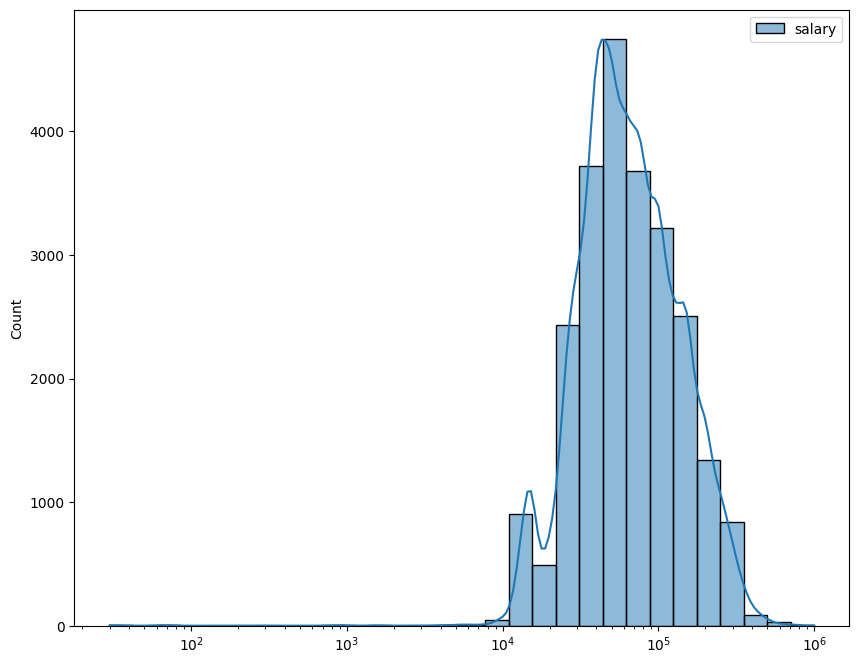

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.histplot(
    data=salary,
    bins=30,
    kde=True,
    log_scale=True
);
display(salary.median())


In [21]:
query_ds_salary = f'''
select
salary
from 
(select
coalesce(salary_from, 0) + coalesce(salary_to, 0) salary 
from VACANCIES
where 
(
    lower(name) like '%data scientist%' or  
    lower(name) like '%data science%' or  
    lower(name) like '%исследователь данных%' or  
    lower(name) like '%machine learning%' or  
    lower(name) like '%машинн%обучен%' or  
    (name like '%ML%' and not name ilike '%html%' )
) 
and 
(salary_from is NULL or salary_to is NULL)

union all

(
select
(coalesce(salary_from, 0) + coalesce(salary_to, 0)) / 2 salary 
from VACANCIES
where 
(
    lower(name) like '%data scientist%' or  
    lower(name) like '%data science%' or  
    lower(name) like '%исследователь данных%' or  
    lower(name) like '%machine learning%' or  
    lower(name) like '%машинн%обучен%' or  
    (name like '%ML%' and not name ilike '%html%' )
) 
and 
((not salary_from is NULL) and not (salary_to is NULL))
)
) x
where salary > 0
             '''


ds_salary = pd.read_sql_query(query_ds_salary, connection)
ds_salary

C:\Users\Марат\AppData\Local\Temp\ipykernel_25136\3672416945.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_salary = pd.read_sql_query(query_ds_salary, connection)


,salary
0,60000
1,37000
2,60000
3,50000
4,75000
...,...
57,225000
58,143500
59,350000
60,275000


salary    162500.0
dtype: float64

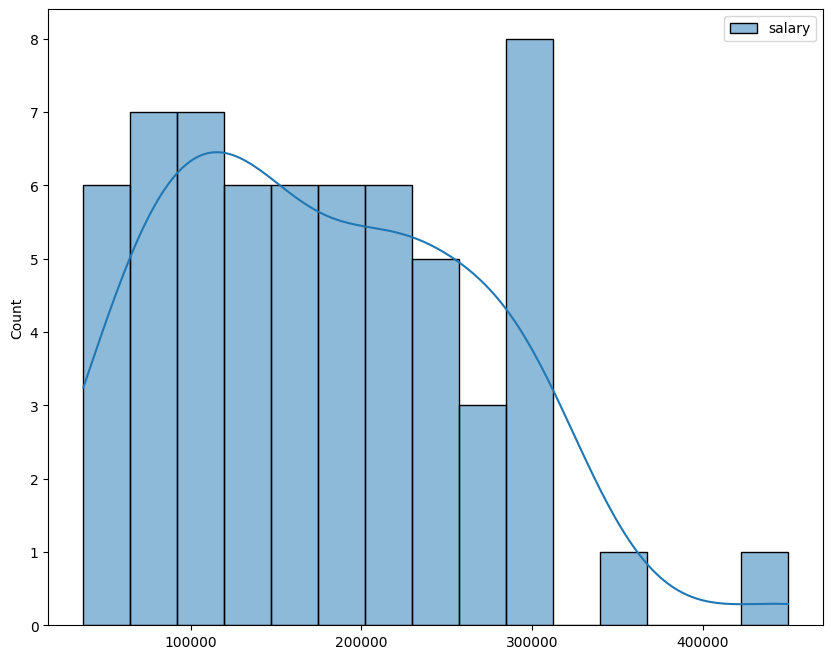

In [25]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
sns.histplot(
    data=ds_salary,
    bins=15,
    kde=True,
    log_scale=False
);
display(ds_salary.median())

С хороше точностью можно сказать, что распределение зарплат дата-сайентистов является равномерным, что существенно отличается от логнормального, характерного для генеральной совокупности. Это говорит о том, что рынок труда дата-сайентистов существует по иным законам, чем общий рыной труда. 

Это связано с тем, что DS &mdash; это молодая область. Это, кстати, перекликается с одним из выводов, сделанных в предыдущем пункте этого проекта. Можно ожидать, что по мере насыщения рынок дата-сайентистов придет к равновесию, а распределение вакансий будет логнормальным. 

Все это, однако, опирается на предположение, что вакансии без указания зп или зп-вилки "играют" по тем же правилам. Это определенная спекуляция, опирающаяся на здравый смысл, но по хорошему эта гипотеза должна быть проверена. К сожалению, данного датасета недостаточно, чтобы сделать это, но здесь мог бы помочь датасет из предыдущего проекта с резюме. 

Сравнение DS-вакансий с общим датасетом можно было бы продолжить, сделав разрез по опыту и по регионам. Кроме того, интересно было бы подробнее исследовать ваканскионную емкость работодателей, также в разрезе. 

In [77]:
# connection.close()